# CMSC471 Artificial Intelligence

# Project Final Submission

## Predicting Expected Goals

*Matt Fodel BT61333*

## Problem Description
There are many questions that can be asked in regard to sports analytics. In this case, the question I will be focusing on is: will a given shot be a goal? As the highest volume sports betting industry, there is undoubtedly a large appeal to predict various events that happen within a soccer match. The way that games are decided in this sport are goals, so it follows that goals are the most important part of every game. To this end, I will be creating an Expected Goal model that attempts to apply a binary classification strategy to define how likely it is for a player to score a goal with a given shot while confronted with certain conditions. 

## Motivation
The basis of my project is the multi-millon dollar industry that is soccer. In addition to the millions of people who are involved in the game worldwide, there is also the potential for individuals to make large amounts of money through the gambling industry. There are many betting companies that provide monetary rewards for the correct forecasting of results, among other predictions. Also, I have been an avid fan of the English Premier League for years and see this project as an opportunity to apply my knowledge of Machine Learning to something I enjoy. To this end, I have decided to try to address this problem. 

## Dataset
Link to dataset source: https://www.kaggle.com/secareanualin/football-events

This dataset goes beyond the simple aggregation data of Goals, Shots, Fouls, etc. This data includes information regarding events within a soccer match as well as the aggregated information so as to add context to the aggregated data of each match. The main difference in this dataset is that text commentary of the match was able to be obtained. These pieces of text allow for the classifications of 15 different types of events. The data included is from the interval of the 2011/2012 season to the 2016/2017 and contains information on games from the five biggest leagues in the world, namely the top divisions in England, Spain, France, Germany, and Italy. The dataset is organized in three files. The events.csv file contains data about the events from each game. The ginf.csv file contains metadata about each game as well as the odds from each game. Finally, dictionary.txt contains a dictionary with the textual description of each categorical variable coded with integers. The target label, which will be predicted in the expected goals calculation, is the is_goal feature that is a binary value which details if a corresponding shot resulted in a goal, 0 for no goal and 1 for a goal being the two classes. The prediction of this feature will be applied through a binary classification strategy. I will be using the events file to predict the is_goal label based on the bodypart, assist_method, situation, and fast_break features. In terms of the ginf file, I will not be using this file for my goals predictions. 

## <font color="red"> Required Coding

In [1]:
# Import necessary Python, sklearn and/or tensorflow/keras modules
import pandas as pd

# Load the data
events = pd.read_csv("football-events/events.csv")
# stores all the shots, shots are defined as events having event_type = 1 in the events file.
shots = events[(events.event_type == 1)]

# Print data shape via built-in methods of sklearn, pandas or tensorflow/keras (or other modules)
print(shots.shape)

(229135, 22)


In [2]:
# Show the data head (if pandas is used)
# If the dataset contains images or is non-pandas/non-tabular, show at least one sample of the data
shots.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
11,UFot0hit/,UFot0hit12,12,14,Attempt missed. Shinji Kagawa (Borussia Dortmu...,1,12.0,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,13.0,2.0,0,15.0,1.0,1,1.0,0
13,UFot0hit/,UFot0hit14,14,17,"Goal! Borussia Dortmund 1, Hamburg 0. Kevin G...",1,12.0,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0
14,UFot0hit/,UFot0hit15,15,19,Attempt blocked. Mats Hummels (Borussia Dortmu...,1,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0
17,UFot0hit/,UFot0hit18,18,20,Attempt blocked. Tomas Rincon (Hamburg) right ...,1,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0


## Data Preprocessing

List any steps you have taken for preprocessing, such as cleaning, dropping NAs, dropping any redundant/irrelevant column, normalizing/scaling, etc. HERE:

- Preprocessing Steps: __Converting the following features to binary dummy values: location, bodypart, assist_method, situation (fast_break and is_goal are already binary). In addition, all shots where the location was not recorded will be discarded as they will skew the performance metrics of each model.__
<br>

- Specify the details of data splitting to train/test or cross validation. Mention the ratio for splitting and number of folds for cv: __I decided to use 33% of the dataset for testing as the dataset is very large and 67% of the data being used for training will allow me to sufficiently train my models. Additionally, I used a 10 fold cross validation approach in order to analysis the performance of both Stochastic Gradient Descent classifier and my Logistic Regression classifier.__
<br>


## <font color="red"> Required Coding

In [3]:
# Import necessary preprocessing modules
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
# Data Preprocessing code here

#drop all columns where location was not recorded
shots = shots[pd.notnull(shots['location'])]
shots.head()

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
11,UFot0hit/,UFot0hit12,12,14,Attempt missed. Shinji Kagawa (Borussia Dortmu...,1,12.0,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,13.0,2.0,0,15.0,1.0,1,1.0,0
13,UFot0hit/,UFot0hit14,14,17,"Goal! Borussia Dortmund 1, Hamburg 0. Kevin G...",1,12.0,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0
14,UFot0hit/,UFot0hit15,15,19,Attempt blocked. Mats Hummels (Borussia Dortmu...,1,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0
17,UFot0hit/,UFot0hit18,18,20,Attempt blocked. Tomas Rincon (Hamburg) right ...,1,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,2.0,3.0,0,15.0,1.0,0,1.0,0


In [5]:
#gets all the rows of the last 6 features of the shots data. 
shots_pred = shots.iloc[:,-6:]
temp = pd.get_dummies(shots_pred, columns=['location', 'bodypart','assist_method', 'situation'])
# drop the column corresponding to location NA value.
situation = temp.drop(columns = "location_19.0")
# includes all possible values of every feature that we are converting to binary values. 
situation.columns = ['is_goal', 'fast_break', 'loc_centre_box', 'loc_diff_angle_lr', 'diff_angle_left', 'diff_angle_right', 'left_side_box', 'left_side_6ybox', 'right_side_box', 'right_side_6ybox', 'close_range', 'penalty', 'outside_box', 'long_range', 'more_35y', 'more_40y', 'right_foot', 'left_foot', 'header', 'no_assist', 'assist_pass', 'assist_cross', 'assist_header', 'assist_through_ball', 'open_play', 'set_piece', 'corner', 'free_kick']
# data is ready to use
situation.head()

,is_goal,fast_break,loc_centre_box,loc_diff_angle_lr,diff_angle_left,diff_angle_right,left_side_box,left_side_6ybox,right_side_box,right_side_6ybox,...,header,no_assist,assist_pass,assist_cross,assist_header,assist_through_ball,open_play,set_piece,corner,free_kick
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
13,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [20]:
# X contains all features except 'is_goal'
# y contains only 'is_goal'
X = situation.drop(columns = 'is_goal')
y = situation.is_goal

print(X.shape)
print(y.shape)

(229135, 27)
(229135,)


In [21]:
# Split to train/test sets code here (if applicable)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42
)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(153520, 27)
(153520,)
(75615, 27)
(75615,)


## Methods

List your sklearn and tensorflow methods HERE:

1- Sklearn Method No.1: Stoichastic Gradient Descent 

2- Sklearn Method No.2: Logistic Regression

3- Tensorflow Method: Neural Network

Individual students need to work with 2 sklearn methods and 1 tensorflow method.

<b>Notice:</b> You should fine-tune at least one hyperparameter of each method by using multiple values (at least 3 different values).

## <font color="red"> Required Coding

In [22]:
# Import any necessary method/algorithm modules from sklearn and tf/keras here
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

In [23]:
# Sklearn Method 1 code here

sgd_clf = SGDClassifier(loss="log", random_state = 42, alpha = .0001, penalty = "none")
sgd_cv_score = cross_val_score(sgd_clf, X, y, scoring = 'roc_auc', cv = 10)
sgd_acc_score = cross_val_score(sgd_clf, X, y, scoring = 'accuracy', cv = 10)

print("Mean AUC Score - Stochastic Gradient Descent: ", sgd_cv_score.mean())
print("Mean Accuracy Score - Stochastic Gradient Descent", sgd_acc_score.mean())

# Fit the sgd_clf on the training set
sgd_clf.fit(X_train,y_train)

# used for discussion, shows the situations most likely to be goals based on the model.
scores = pd.Series(logreg_clf.coef_[0], X_train.columns)
print(scores)

#used for ROC plot
sgd_preds = sgd_clf.decision_function(X_test)
sgd_fpr, sgd_tpr, sgd_threshold = metrics.roc_curve(y_test, sgd_preds)
sgd_roc_auc = metrics.auc(sgd_fpr, sgd_tpr)

Mean AUC Score - Stochastic Gradient Descent:  0.8154427815687132
Mean Accuracy Score - Stochastic Gradient Descent 0.9100879399184805
fast_break              1.712896
loc_centre_box         -8.680460
loc_diff_angle_lr     -10.657706
diff_angle_left        -9.709066
diff_angle_right       -9.747931
left_side_box          -9.968404
left_side_6ybox        -8.312016
right_side_box         -9.926017
right_side_6ybox       -8.303958
close_range            -6.900789
penalty                -6.598115
outside_box           -10.716205
long_range            -11.179628
more_35y              -11.630701
more_40y              -11.068590
right_foot              1.455668
left_foot               1.400423
header                  0.842979
no_assist               0.649937
assist_pass             0.708540
assist_cross            0.277095
assist_header           0.456776
assist_through_ball     1.606722
open_play               1.255635
set_piece               2.035173
corner                  1.760361
free_ki

In [24]:
# Sklearn Method 2 code here 

logreg_clf = LogisticRegression(random_state = 42, solver = 'sag', C = 10000, max_iter = 150, penalty= 'l2')
logreg_cv_score = cross_val_score(logreg_clf, X, y, scoring = 'roc_auc', cv = 10)
logreg_acc_score = cross_val_score(logreg_clf, X, y, scoring = 'accuracy', cv = 10)

print("Mean AUC Score - Logistic Regression: ", logreg_cv_score.mean())
print("Mean Accuracy Score - Logistic Regression", logreg_acc_score.mean())

logreg_clf.fit(X_train,y_train)

# used for discussion
scores = pd.Series(logreg_clf.coef_[0], X_train.columns)
print(scores)

#used for ROC plot
logreg_probs = logreg_clf.predict_proba(X_test)
logreg_preds = logreg_probs[:,1]
logreg_fpr, logreg_tpr, logreg_threshold = metrics.roc_curve(y_test, logreg_preds)
logreg_roc_auc = metrics.auc(logreg_fpr, logreg_tpr)

Mean AUC Score - Logistic Regression:  0.8160891966385424
Mean Accuracy Score - Logistic Regression 0.9104894493741973
fast_break              1.719123
loc_centre_box         -9.102040
loc_diff_angle_lr     -11.059504
diff_angle_left       -10.119383
diff_angle_right      -10.167554
left_side_box         -10.368081
left_side_6ybox        -8.736926
right_side_box        -10.336620
right_side_6ybox       -8.745504
close_range            -7.314585
penalty                -7.019023
outside_box           -11.151309
long_range            -11.601517
more_35y              -12.230907
more_40y              -11.665958
right_foot              1.526313
left_foot               1.476611
header                  0.897157
no_assist               0.698114
assist_pass             0.746251
assist_cross            0.327597
assist_header           0.500237
assist_through_ball     1.627882
open_play               1.354368
set_piece               2.141690
corner                  1.859798
free_kick              

In [25]:
# Tensorflow/keras Method code here
import tensorflow as tf

# Load train and test data to tf
train_tensor = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
test_tensor = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))

# Batch train and test data - 100 as the batch size
train_batch = train_tensor.shuffle(len(X_train)).batch(100)
test_batch = test_tensor.shuffle(len(X_test)).batch(100)

# Build a Sequential neural network - a binary classifier model with 3 hidden layers
nn_clf = tf.keras.Sequential([
    tf.keras.layers.Dense(12, input_dim = 27, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

optimizer = tf.keras.optimizers.Adam(.001)
nn_clf.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['AUC', 'accuracy'])

# Fit nn_clf model on train_batch with 150 epochs
nn_clf_history = nn_clf.fit(train_batch, epochs = 25)

# Evaluate the model on the Test_batch 
nn_clf.evaluate(test_batch)

Epoch 1/25
1536/1536 [==============================] - 14s 9ms/step - loss: 0.2849 - AUC: 0.7794 - accuracy: 0.9015
Epoch 2/25
1536/1536 [==============================] - 8s 5ms/step - loss: 0.2610 - AUC: 0.8129 - accuracy: 0.9103
Epoch 3/25
1536/1536 [==============================] - 8s 5ms/step - loss: 0.2596 - AUC: 0.8141 - accuracy: 0.9106
Epoch 4/25
1536/1536 [==============================] - 8s 5ms/step - loss: 0.2590 - AUC: 0.8148 - accuracy: 0.9104
Epoch 5/25
1536/1536 [==============================] - 8s 5ms/step - loss: 0.2588 - AUC: 0.8147 - accuracy: 0.9106
Epoch 6/25
1536/1536 [==============================] - 7s 5ms/step - loss: 0.2587 - AUC: 0.8152 - accuracy: 0.9106
Epoch 7/25
1536/1536 [==============================] - 7s 5ms/step - loss: 0.2585 - AUC: 0.8154 - accuracy: 0.9106
Epoch 8/25
1536/1536 [==============================] - 8s 5ms/step - loss: 0.2584 - AUC: 0.8152 - accuracy: 0.9106
Epoch 9/25
1536/1536 [==============================] - 8s 5ms/step - l

[0.2599385587530533, 0.8176899, 0.9086028]

Mean Accuracy  - Neural Network 0.910352
Mean AUC  - Neural Network 0.81406987


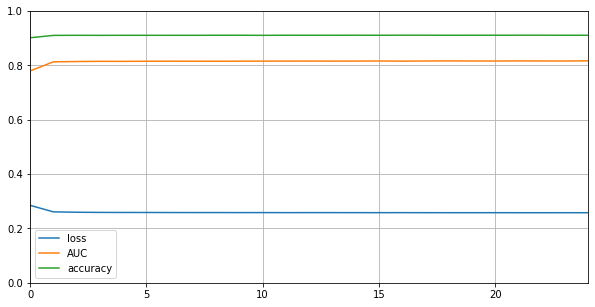

In [26]:
# Method 3 Plot
import matplotlib.pyplot as plt
%matplotlib inline
import statistics

# plots the history
pd.DataFrame(nn_clf_history.history).plot(figsize=(10, 5))
plt.grid(True)
# set the y-axis range to [0-1]
plt.gca().set_ylim(0, 1)

print("Mean Accuracy  - Neural Network", statistics.mean(nn_clf_history.history['accuracy']))
print("Mean AUC  - Neural Network", statistics.mean(nn_clf_history.history['AUC']))

# Used for ROC curve
# Get class probabilities for nn - ignore the warning
nn_preds = nn_clf.predict(X_test).ravel()
# See class probabilities predicted by nn classifier
nn_preds[:5]
nn_fpr, nn_tpr, nn_threshold = metrics.roc_curve(y_test, nn_preds)
nn_roc_auc = metrics.auc(nn_fpr, nn_tpr)

In [27]:
# import necessary modules for hyperparameter tuning
import parfit.parfit as pf
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score

-------------FITTING MODELS-------------
-------------SCORING MODELS-------------


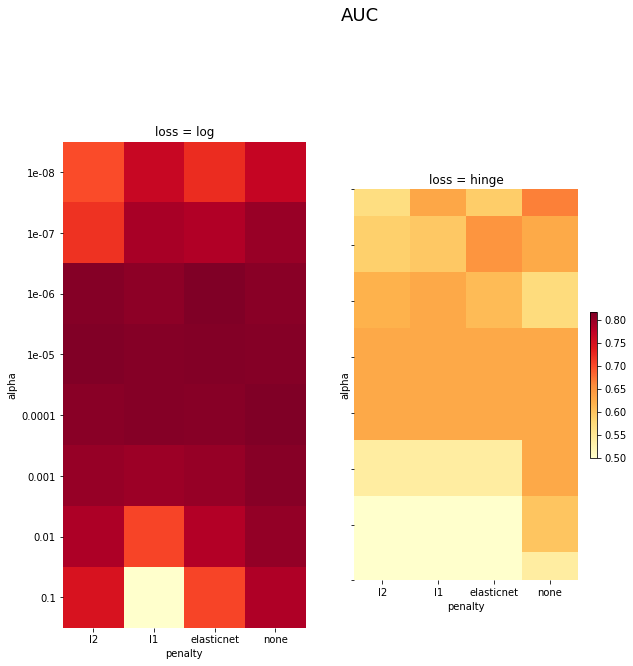

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='none', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) 0.8168948813874699


In [28]:
# Hyperparameter tuning code here

# Method 1 Hyperparameter Tuning
grid = {
    'alpha': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], # learning rate being tuned
    'loss': ['log', 'hinge'], 
    'penalty': ['l2', 'l1', 'elasticnet', 'none'],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)

bestModel1, bestScore1, allModels, allScores = pf.bestFit(SGDClassifier, paramGrid,
           X_train, y_train, X_test, y_test, 
           metric = roc_auc_score, scoreLabel = "AUC", verbose = 0)

print(bestModel1, bestScore1)

-------------FITTING MODELS-------------
-------------SCORING MODELS-------------


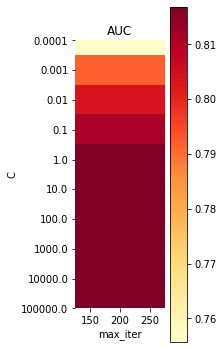

LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False) 0.8168263051789456


In [34]:
# Method 2 Hyperparameter Tuning

grid = {
    'C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5], # learning being tuned
    'penalty': ['l2'],
    'solver': ['sag'], 
    'n_jobs': [-1],
    'max_iter': [150, 200, 250] # also being tuned
}
paramGrid = ParameterGrid(grid)

bestModel2, bestScore2, allModels, allScores = pf.bestFit(LogisticRegression, paramGrid,
           X_train, y_train, X_test, y_test, 
           metric = roc_auc_score, scoreLabel = "AUC", verbose = 0)

print(bestModel2, bestScore2)

In [30]:
# list for Method 3 Tuning plot
tune_AUC = []

In [37]:
# Method 3 Hyperparameter Tuning
# Build a Sequential neural network - a binary classifier model with 3 hidden layers
nn_clf2 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, input_dim = 27, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

optimizer = tf.keras.optimizers.SGD(.001) # being tuned
nn_clf2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['AUC', 'accuracy'])
nn_clf2_history = nn_clf2.fit(train_batch, epochs=25)
# Appeand Mean AUC to list, tuning the specified values below for each optimizer's learning rate 
tune_AUC.append(statistics.mean(nn_clf2_history.history['AUC']))          
print("Mean Accuracy  - Neural Network Tuning", statistics.mean(nn_clf2_history.history['accuracy']))
print("Mean AUC  - Neural Network Tuning", statistics.mean(nn_clf2_history.history['AUC']))

Epoch 1/25
1536/1536 [==============================] - 14s 9ms/step - loss: 0.3453 - AUC: 0.5028 - accuracy: 0.8929
Epoch 2/25
1536/1536 [==============================] - 8s 5ms/step - loss: 0.3462 - AUC: 0.5002 - accuracy: 0.8934
Epoch 3/25
1536/1536 [==============================] - 8s 5ms/step - loss: 0.3453 - AUC: 0.5014 - accuracy: 0.8934
Epoch 4/25
1536/1536 [==============================] - 8s 5ms/step - loss: 0.3455 - AUC: 0.4948 - accuracy: 0.8934
Epoch 5/25
1536/1536 [==============================] - 8s 5ms/step - loss: 0.3446 - AUC: 0.4981 - accuracy: 0.8934
Epoch 6/25
1536/1536 [==============================] - 8s 5ms/step - loss: 0.3443 - AUC: 0.5054 - accuracy: 0.8934
Epoch 7/25
1536/1536 [==============================] - 8s 5ms/step - loss: 0.3448 - AUC: 0.5020 - accuracy: 0.8934
Epoch 8/25
1536/1536 [==============================] - 8s 5ms/step - loss: 0.3459 - AUC: 0.4981 - accuracy: 0.8934
Epoch 9/25
1536/1536 [==============================] - 8s 5ms/step - l

__Results of your Hyperparameter Tuning (Approximate values of each metric)__

SGD with learning_rate = .001 - Testing Set AUC, Testing Set Accuracy: .749, .896
<br>
Adam_learning_rate1 = .001 - Testing Set AUC, Testing Set Accuracy: .815, .9105
<br>
Adam learning_rate2 = .01 - Testing Set AUC, Testing Set Accuracy: .812, .9102
<br>
Adam learning_rate3 = .1 - Testing Set AUC, Testing Set Accuracy: .520, .8937
<br>
Adam learning_rate4 = 1 - Testing Set AUC, Testing Set Accuracy: .499, .893

## Results

Your results must include at least one comparison table and two plots

### Comparison Table

You should compare all of the methods in one or multiple tables, showing clearly the method names, the metrics used for comparison and the results (accuracy, scores, loss, etc). You may use [online tools such as this](https://www.tablesgenerator.com/markdown_tables) for generating and editing neatly-formatted tables in Markdown. You can then copy the code to your Markdown cell to generate the plot.
<br>

<b>Notice: </b>You should use at least two different metrics for comparison of your methods.

Your comparison table HERE:<br><br>

| Metric/Method  | Stochastic Gradient Descent | Logistic Regression | Neural Network |
|:--------------:|:--------:|:--------:|:--------:|
|    Accuracy    |     .910    |     .910     |     .910     |
|      AUC in ROC plot      |   .8154       |     .8160     |     .8176     |

### Plots

Using meaningful plots is an efficient way to visualize and conlude your experiments as well as results. Examples of acceptable plots include but are not limited to:
- ROC curve (can be used with classification only)
- loss plots (precision/recall for classification, mse or mae for regression)
- hyperparameter tuning plots (varying one hyperparameter using for loops on x-axis and accuracy/loss on y-axis)
- train/validation/test errors/loss plots, histogram of errors and so on.

<b>Notice:</b> All plots should have title, xlabel, ylabel, and (if applicable) legend. Use different colors if you have multiple curves on one plot. Points will be deducted if your plots are incomplete. Check matplotlib documentation, examples from the assignments, and research papers or ML articles and find those plots that are applicable to your project. Individual students should have at least 2 plots.


## <font color="red"> Required Coding

Text(0.5, 0, 'False Positive Rate')

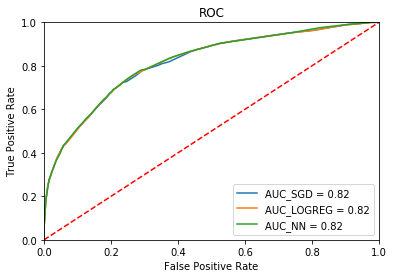

In [38]:
# Plot-1 code here ROC curves for every model.

# Plot ROC curve.
plt.title('ROC')
plt.plot(sgd_fpr, sgd_tpr, label = 'AUC_SGD = %0.2f' % sgd_roc_auc)
plt.plot(logreg_fpr, logreg_tpr, label = 'AUC_LOGREG = %0.2f' % logreg_roc_auc)
plt.plot(nn_fpr, nn_tpr, label = 'AUC_NN = %0.2f' % nn_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

-------------FITTING MODELS-------------
-------------SCORING MODELS-------------


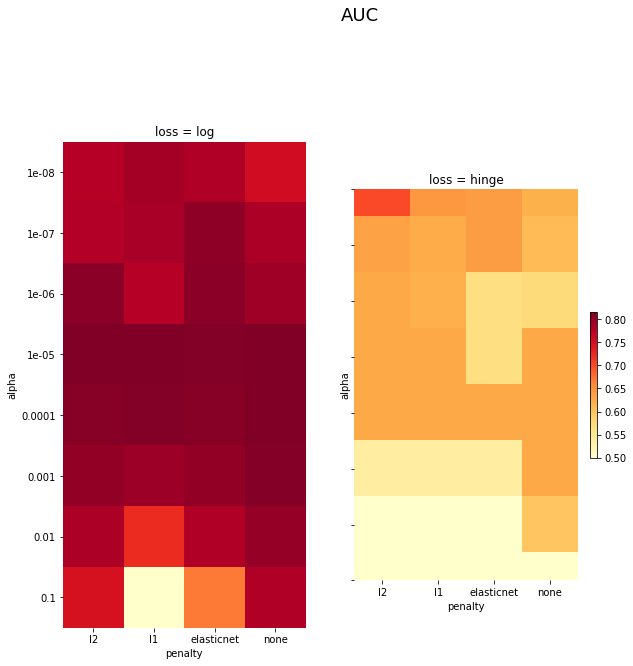

-------------FITTING MODELS-------------
-------------SCORING MODELS-------------


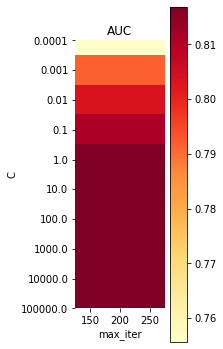

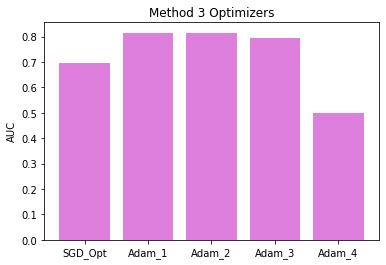

In [39]:
# Plot-2 code here'
import numpy as np
# Method 1 Hyperparameter Tuning plot
grid1 = {
    'alpha': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], # learning rate
    'loss': ['log', 'hinge'], 
    'penalty': ['l2', 'l1', 'elasticnet', 'none'],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid1)
bestModel1, bestScore1, allModels, allScores = pf.bestFit(SGDClassifier, paramGrid,
           X_train, y_train, X_test, y_test, metric = roc_auc_score, scoreLabel = "AUC", verbose = 0)
# Method 2 Hyperparameter Tuning plot
grid2 = {
    'C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5],
    'penalty': ['l2'],
    'solver': ['sag'], 
    'n_jobs': [-1],
    'max_iter': [150, 200, 250]
}
paramGrid = ParameterGrid(grid2)
bestModel2, bestScore2, allModels, allScores = pf.bestFit(LogisticRegression, paramGrid,
           X_train, y_train, X_test, y_test, 
           metric = roc_auc_score, scoreLabel = "AUC", verbose = 0)
# Method 3 Hyperparameter Tuning plot, tune_AUC values obtained from method 3 hyperparameter tuning cell
objects = ('SGD_Opt', 'Adam_1', 'Adam_2', 'Adam_3', 'Adam_4')
y_pos = np.arange(len(objects))
plt.bar(y_pos, tune_AUC, align='center', alpha=0.5, color = 'm')
plt.xticks(y_pos, objects)
plt.ylabel('AUC')
plt.title('Method 3 Optimizers')
plt.show()

## Discussion

Write at least two paragraphs to describe and discuss your results. Make arguments based on your observations and results. Use reasoning and analytical thinking for your discussion.


<b>Notice:</b> Having a thorough discussion is VERY important and has a significant impact on your final score!

> My First piece of analysis will be regarding the quality of my two selected metrics. I have purposely chosen what I see to be one good indicator of the performance of my models and one not so good indicator of the performance of my models. For my project, the AUC of my models was my choice of a good metric and the accuracy of my models was my choice of not so good metric. Even though my models' accuracy is relatively high at about 91%, this is misleading as a simple measure of accuracy will be biased to the size of the test data. As shown by the shape of the shots dataset, there is a very high number of shots that are captured in the data, specifically, 229,135 shots. Further, both of these metrics are slightly lacking in their ability to represent the true performance of model as their is a very high imbalance in the data. Relatively, there are a very high number of shots in the data that do not end up being goals. For example, if I was to build my model and tell it to pick "no goal" as the result for every shot, the model's accuracy would end up being about 89%. 


> Secondly, I will be discussing the hyperparameter tuning sections of my project. For my sklearn methods, I was able to find a package, parfit, that would handle the iterative analysis of each desired hyperparameter in addition to the plotting of this analysis, which made hyperparameter tuning for these methods extremely efficient. When performing my hyperparameter tuning, I was only focusing on the values for AUC as that was the metric that I deemed to be more worthwhile as discussed in the above paragraph. Even after I had spent the time finding my optimal hyperparameters, I could not find a significant increase in any of my models. This lack of perfomance increase leads me to believe that the only way to reach a large spike in the performance of my models would be to add more data to the dataset I have worked with. Specifically, more quantified data about the location of each shot could help to improve the performance of my models. Finally, one interesting observation I made was that in both my Stochastic Gradient Descent and Logistic Regression models, the most likely situation for a goal was a set piece situation. This observation would lead me to believe that my Neural Network model would find very similar results in terms of feature importance. However, it proved more difficult to obtain the feature importance scores for my Neural Network model.    

## Grading

Project grading rubric (total 100 points - 20% of the final grade):

- Project proposal: 10 points

- Final submission: 70 points - Breakdown as follows

    - 30 points: Methods, hyperparameter tuning and comparison table
    
    - 20 points: Plots

    - 20 points: Discussion (2 paragraphs)
    
- Project complexity and intellectual efforts judged by the instructor: 20 points
    
<b>Notice:</b> similar to the assignments, up to 10 points may be deducted if your notebook is not easy to read and/or has spelling/grammatical errors, so proofread your notebook!

## How to Submit and Due Date - Late Penalty Will be Strictly Applied!

Name your final project notebook ```Lastname-Project.ipynb```. Submit the notebook file with your dataset file in a zip file named EXACTLY as `Lastname-Project.zip` using the ```Final Project``` link on Blackboard.

<font color=red><b>Project Final Submission Due Date: Monday Dec 9th 11:59PM.</b></font>